In [5]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [7]:
dat = pd.read_excel("data/sample_data.xlsx", sheet_name=1)

hour 5


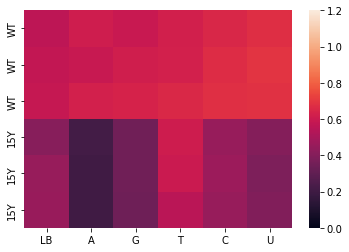

hour 10


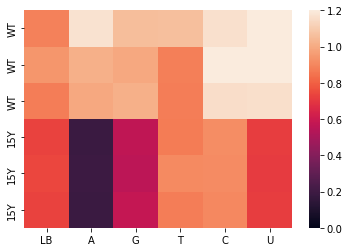

hour 15


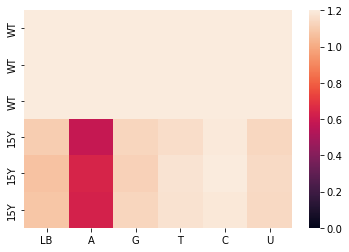

hour 20


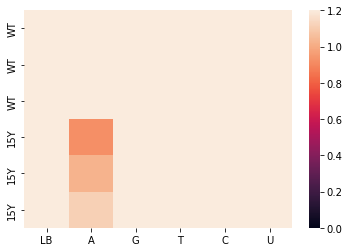

In [8]:
for t in [5, 10, 15, 20]:
    print('hour ' + str(t))
    
    #get data
    timepoint = dat.iloc[t*2, 1:]

    #reformat data
    timepoint = np.array(timepoint, dtype=float)
    timepoint = timepoint.reshape(10, 10)
    timepoint = pd.DataFrame(timepoint)
    
    timepoint = timepoint.iloc[0:6, 0:6]
    
    timepoint.index = ['LB', 'A', 'G', 'T', 'C', 'U'] #labels for the y axis
    timepoint.columns = ['WT', 'WT', 'WT', '15Y', '15Y', '15Y'] #labels for the x axis
    
    
    #plot data
    sns.heatmap(timepoint.T,
               vmin=0, vmax=1.2, #these control the lower and upper bound of the scale
               )
    plt.show()

In [9]:
wells = [1, 4, 11, 14, 21, 24, 31, 34, 41, 44, 51, 54]

wells = [[w, w+1, w+2] for w in wells] #make a temporary list with the triplicates
wells = [item for sublist in wells for item in sublist] #flatten list

wells = ['Well-'+str(w) for w in wells]

labels1 = ['WT', '15Y', 'WT', '15Y', 'WT', '15Y', 'WT', '15Y', 'WT', '15Y', 'WT', '15Y', ]
labels2 = ['LB', 'LB', 'A', 'A', 'G', 'G', 'T', 'T', 'C', 'C', 'U', 'U']

t = [[w + ' ' + y]*3 for w, y in zip(labels1, labels2)]
labels = [item for sublist in t for item in sublist] #flatten list

In [10]:
#get wells of interest previously created 'wells' variable
df = dat.loc[:, wells].apply(pd.to_numeric)
df.columns = labels
df.loc[:, 'Time'] = [i/2 for i in range(len(df))]

Text(0, 0.5, 'OD600')

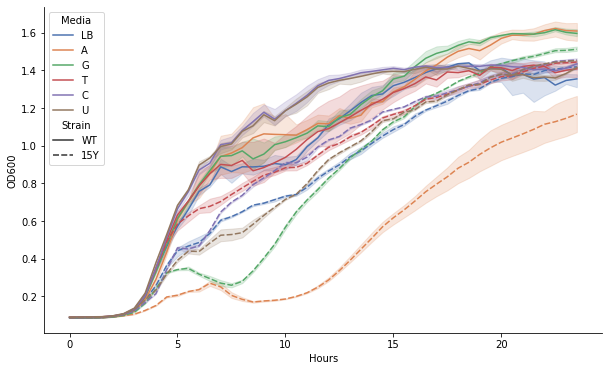

In [11]:
m = pd.melt(df, id_vars=['Time'], value_vars=labels)
m['Strain'] = m.variable.str.split().str[0]
m['Media'] = m.variable.str.split().str[1]

plt.figure(figsize = (10, 6))

ax = sns.lineplot(x='Time', y='value', hue='Media', style='Strain', data=m, palette='deep')
sns.despine()

ax.set_xlabel('Hours')
ax.set_ylabel('OD600')